In [36]:
#import libraries needed
import numpy as np
import matplotlib.pyplot as plt

# Optimization via Gradient Descent

In this homework, we want to study methods to solve the general optimization problem where,
given a function $f : \mathbb{R}^n → \mathbb{R}$, we want to compute

$$ x^* = \underset{x ∈\mathbb{R}^n}{arg\,min}\;f(x) $$ 

In particular, we will consider the situation where $f(x)$ is at least differentiable, which implies that we can compute its gradient $∇f(x)$.

In this framework, one of the most common way to approach is to use the Gradient Descent (GD)
method, which is an iterative algorithm that, given an initial iterate $x_0 ∈\mathbb{R}^n$ and a positive parameter called
step size $α_k > 0$ for each iteration, computes

$$ x_{k+1} = x_k − α_k∇f(x_k) $$

You are asked to implement the GD method in Python and to test it with some remarkable functions.


- Write a script that implement the GD algorithm, with the following structure:

        Input:

                f: the function f(x) we want to optimize.

                It is supposed to be a Python function, not an array.

                grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.

                x0: an n-dimensional array which represents the initial iterate.

                kmax: an integer. The maximum possible number of iterations (to avoid infinite loops)

                tolf: small float. The relative tollerance of the algorithm.

                Convergence happens if ||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2
                tolx: small float. The tollerance in the input domain.
                Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.

        Pay attention to to the first iterate.
        

        Output:

                x: an array that contains the value of x_k FOR EACH iterate x_k (not only the latter).

                k: an integer. The number of iteration needed to converge. k < kmax.

                f_val: an array that contains the value of f(x_k) FOR EACH iterate x_k.

                grads: an array that contains the value of grad_f(x_k) FOR EACH iterate x_k.

                err: an array the contains the value of ||grad_f(x_k)||_2 FOR EACH iterate x_k.

        For the moment, consider a fixed value of α > 0.

<br>

- It's given the implementation of the backtracking algorithm for the GD method. That function works as follows:

        Input:
        
                f: the function f(x) we want to optimize.

                It is supposed to be a Python function, not an array.

                grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.

                x: an array. The actual iterate x_k for which you want to find the correct value for alpha.

        Output:

                alpha: a float. The correct step size for the next iteration.

        Modify the code for the GD method to let it be able to use the backtracking algorithm for the choice of the step size

In [37]:
def f(x):
    return x**2 + 2*x +1

def grad_f(x):
    return (2*x + 2)

In [38]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [39]:
def GD(f, grad_f, x0, kmax, tolf, tolx, step=0.001, useBackTracking=True, real_value=None):
    
    # Initialization
    k = 0
    true_errors = []

    dim_m, dim_n = (kmax+1, ) + x0.shape

    x = np.empty((dim_m, dim_n))
    f_val = np.empty((kmax+1, ))
    grads = np.empty((dim_m, dim_n))
    err_val = np.empty((kmax+1, ))
    
    # Assign the values for the first iteration
    x[k]=x0
    f_val[k] = f(x0)
    grads[k] = grad_f(x0)
    err_val[k] = np.linalg.norm(grad_f(x0))
    if(real_value!=None): true_errors.append(np.linalg.norm(real_value - x[k]))
    
    # Choose step size
    alpha = step
    
    # Handle the condition for the first iteration
    k+=1
    x[k]=x[k-1]-alpha*grad_f(x[k-1])
    f_val[k] = f(x[k])
    grads[k] = grad_f(x[k])
    err_val[k] = np.linalg.norm(grad_f(x[k]))
    if(real_value!=None): true_errors.append(np.linalg.norm(real_value - x[k]))

    #Conditions
    cond1 = (np.linalg.norm(grad_f(x[k])) > tolf * grad_f(x[k-1])).all()
    cond2 = (np.linalg.norm(x[k] - x[k-1]) > tolx * np.linalg.norm(x[k-1])).all()

    conditions = cond1 and cond2

    # Start the iterations
    while (conditions and k < kmax):

        #Update k
        k = k+1
        
        # Update the value of x
        x[k] = x[k-1]-alpha*grad_f(x[k-1])
        
        #Update alpha
        if useBackTracking:
            alpha = backtracking(f, grad_f, x[k])
        
        #Update values 
        f_val[k] = f(x[k])
        grads[k] = grad_f(x[k])
        err_val[k] = np.linalg.norm(grad_f(x[k]))
        if(real_value!=None): true_errors.append(np.linalg.norm(real_value - x[k]))

        #Update condintions
        cond1 = np.linalg.norm(grad_f(x[k])) > tolf * grad_f(x[k-1]).all()
        cond2 = np.linalg.norm(x[k] - x[k-1]) > tolx * np.linalg.norm(x[k-1]).all()
        conditions = cond1 and cond2
    
    #Truncate the vectors that are (eventually) too long
    x = x[:k+1]
    f_val = f_val[:k+1]
    grads = grads[:k+1]
    err_val = err_val[:k+1]
    
    return x, k, f_val, grads, err_val, true_errors

In [49]:
x, k, fval, grads, errval, _ = GD(f, grad_f, np.asarray([2]), 1000, 1e-6, 1e-6)
print(x[k])

[0.92222856]


- Test the algorithm above on the following functions:
1. $f : \mathbb{R}^2 → \mathbb{R}$ such that

    $f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$
    
    for which the true optimum is $x^* = (3, 1)^T$

<br>

2. $f : \mathbb{R}^2 → \mathbb{R}$ such that

    $f(x1, x2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$

    for which the true optimum is $x^* = (1, 2)^T$

<br>

3. $f : \mathbb{R}^n → \mathbb{R}$ such that

    $f(x) = \frac{1}{2}||Ax − b||_2^2$

    where $A ∈ \mathbb{R}^{n×n}$ is the Vandermonde matrix associated with the vector $v ∈ \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0, 1]$, and $b ∈ \mathbb{R}^n$ is computed by first setting $x_{true} = (1, 1, . . . , 1)^T$ and then $b = Ax_{true}$. Try for different values of $n$ (e.g. $n = 5, 10, 15, . . .$)

<br>

4. $f : \mathbb{R}^n → \mathbb{R}$ such that

    $f(x) = \frac{1}{2}||Ax − b||_2^2+\frac{λ}{2}||x||_2^2$
    
    where $A$ and $b$ are the same of the exercise above, while $λ$ is a fixed value in the interval $[0, 1]$.
    Try different values for $λ$.

<br>

5. $f : \mathbb{R} -> \mathbb{R}$ such that

    $f(x) = x^4 + x^3 -2x^2 - 2x$



- For each of the functions above, run the GD method with and without the backtracking, trying different values for the step size $\alpha > 0$ when you are not using backtracking. Observe the different behavior of GD.
<br>
- To help visualization, it is convenient to plot the error vector that contains the $||∇f(x_k)||_2$, to check that it goes to zero. Compare the convergence speed (in terms of the number of iterations k) in the different cases.
<br>
- For each of the points above, fix $x_0= (0, 0, ..., 0)^T$, kmax = 100, while choose your values for tolf and tolx. It is recommended to also plot the error $||x_k - x^*||_2$ varying k when the true $x^*$ is available.
- Only for the non-convex function defined in 5, plot it in the interval [-3; 3] and test the convergence point of GD with different values of $x_0$ and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.

In [41]:
def f1(x):
    return (x[0]-3)**2 + (x[1]-1)**2

def grad_f1(x):
    grad = np.empty(len(x))
    grad[0] = 2*(x[0]-3)
    grad[1] = 2*(x[1]-1)

    return grad


def f2(x):
    return 10*(x[0]-1)**2 + (x[1]-2)**2    

def grad_f2(x):
    grad = np.empty(len(x))
    grad[0] = 20*(x[0]-1)
    grad[1] = 2*(x[1]-2)

    return grad


def f3(x, n):
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n, ))
    b = A@x_true

    y = 1/2 * (np.linalg.norm(A@x - b))**2

    return y

def grad_f3(x, n):
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n, ))
    b = A@x_true

    grad = A.T @ (A@x - b)
    
    return grad


def f4(x, n, L):
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n, ))
    b = A@x_true

    y1 = 1/2 * (np.linalg.norm(A@x - b))**2
    y2 = L/2 * (np.linalg.norm(x))**2

    return y1 + y2

def grad_f4(x, n, L):
    v = np.linspace(0, 1, n)
    A = np.vander(v)
    x_true = np.ones((n, ))
    b = A@x_true

    grad = A.T @ (A@x - b) + L*x

    return grad


def f5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f5(x):
    return 4*x**3 + 3*x**2 - 4*x -2

---
# Test funciton 1

$f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$

We are going to test the the GD methon on the function with and without backtracking.
When we are not using backtracking we are testing with learning rate of $0.1$, $0.03$ and $0.01$

Using backtracking with k[100]:  [2.9999938  0.99999793]
Not using backtracking, with learning rate[0.1] and k[61]  [2.99999632 0.99999877]
Not using backtracking, with learning rate[0.03] and k[100]  [2.99383538 0.99794513]
Not using backtracking, with learning rate[0.01] and k[100]  [2.60214133 0.86738044]


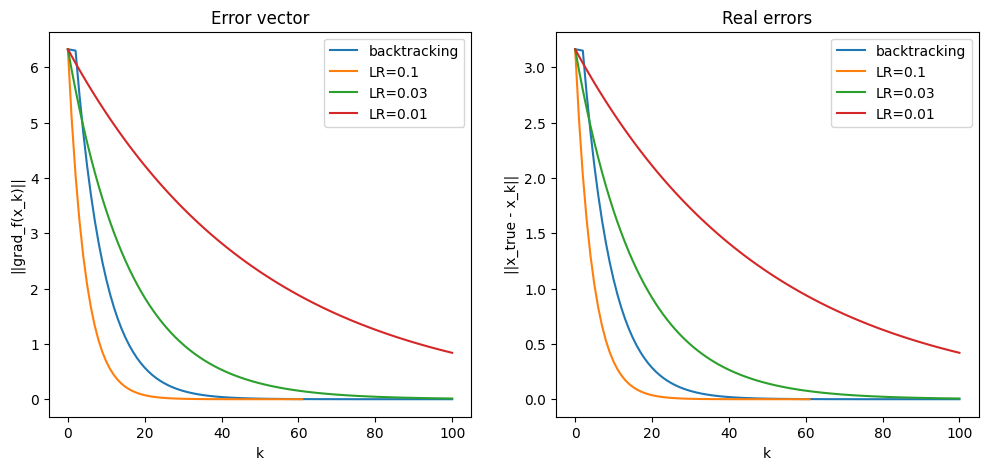

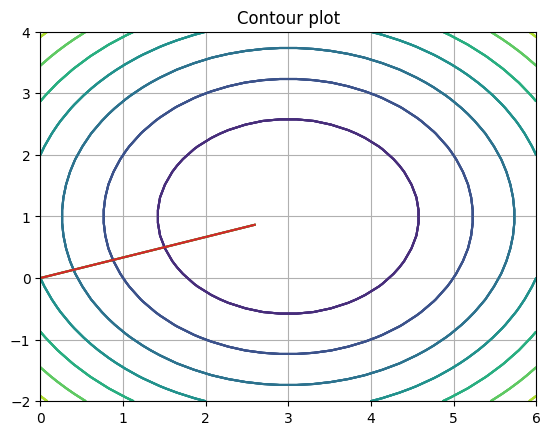

In [52]:
f = lambda x: f1(x)
grad_f = lambda x: grad_f1(x)

x0 = np.asarray([0,0])
tolx = 1e-6
tolf = 1e-6
kmax = 100
x_true = [3, 1]

cvector = np.asarray([0.1, 0.03, 0.01])

f_tot = []
x_tot = []
err_tot = []
k_tot = []
true_errors = []
x_min = np.zeros((4, 2))

x, k, f_val, grads, err_val, real_err  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True, real_value=x_true)
f_tot.append(f_val)
x_tot.append(x)
err_tot.append(err_val)
k_tot.append(k)
true_errors.append(real_err)
x_min[0] = x[k]

print(f"Using backtracking with k[{k}]: ", x_min[0])

i=1
for c in cvector:
    x, k, f_val, grads, err_val, real_err  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False, real_value=x_true)
    
    f_tot.append(f_val)
    x_tot.append(x)
    err_tot.append(err_val)
    k_tot.append(k)
    true_errors.append(real_err)
    x_min[i] = (x[k])

    print(f"Not using backtracking, with learning rate[{c}] and k[{k}] ", x_min[i])

    i+=1

legend=['backtracking', 'LR=0.1', 'LR=0.03', 'LR=0.01']
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title('Error vector')
plt.xlabel('k')
plt.ylabel('||grad_f(x_k)||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, err_tot[e])
plt.legend(legend)


plt.subplot(1,2,2)
plt.title('Real errors')
plt.xlabel('k')
plt.ylabel('||x_true - x_k||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, true_errors[e])
plt.legend(legend)

plt.show()

for i in range(len(x_tot)):
    xv = np.linspace(0,6,30)
    yv = np.linspace(-2,4,30)
    xx, yy = np.meshgrid(xv, yv)
    #Compute the value of f over the grid
    zz = f1([xx, yy])
    plt.contour(xx, yy, zz) 
    
    k_backtracking = k_tot[0]
    #plt.plot(x_min[:,0], x_min[:,1], 'o-')
    plt.plot(x[:k_backtracking,0],x[:k_backtracking,1],'-')
plt.title("Contour plot")
plt.grid()
plt.show()

---

# Test funciton 2

$f(x1, x2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$

We are going to test the the GD methon on the function with and without backtracking.

We are goint to plot with Learning Rate of $0.1$,  $0.08$, $0.04$ and $0.001$ (way smaller to see the difference) to better understand the behaviour of the method.

Using backtracking with k[100]:  [1.         1.99999158]
Not using backtracking, with learning rate[0.1] and k[100]  [0. 2.]
Not using backtracking, with learning rate[0.08] and k[74]  [1.         1.99999501]
Not using backtracking, with learning rate[0.04] and k[100]  [1.         1.99952158]
Not using backtracking, with learning rate[0.001] and k[100]  [0.86738044 0.36286639]


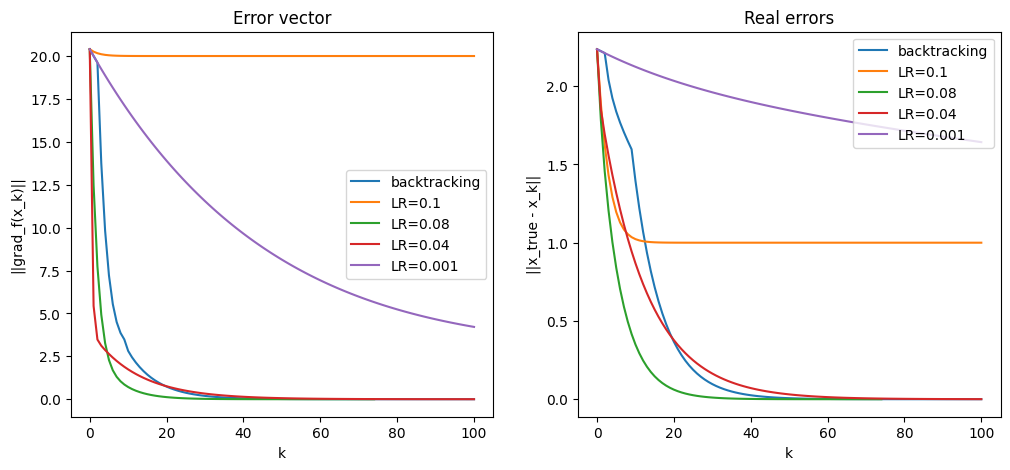

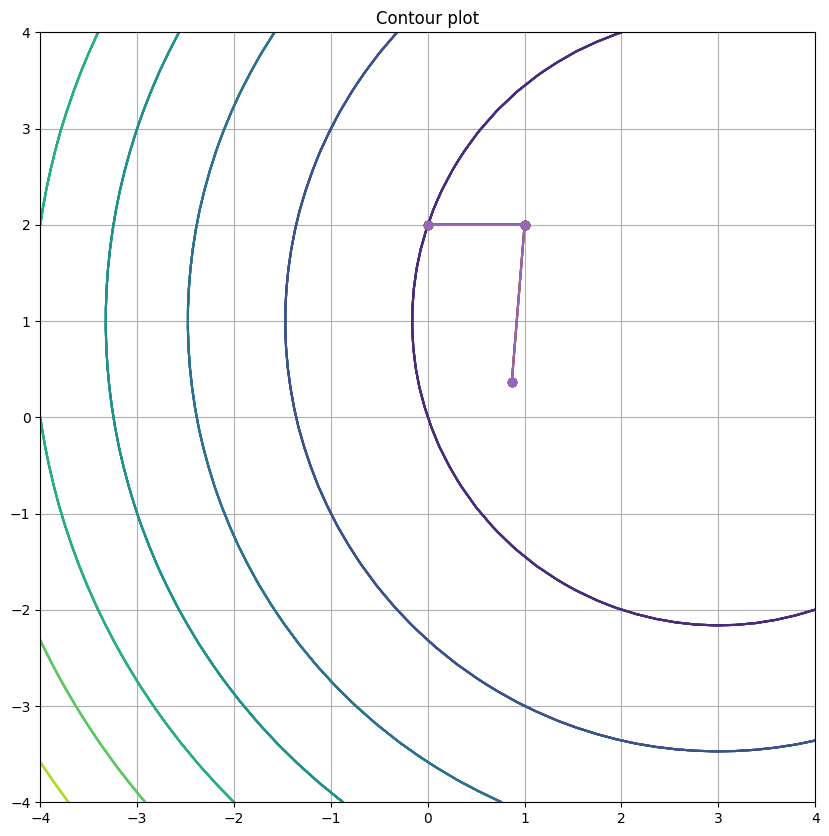

In [43]:
f = lambda x: f2(x)
grad_f = lambda x: grad_f2(x)

x0 = np.asarray([0,0])
tolx = 1e-6
tolf = 1e-6
kmax = 100
x_true = [1, 2]

cvector = np.asarray([0.1, 0.08, 0.04, 0.001])

f_tot = []
x_tot = []
err_tot = []
k_tot = []
true_errors = []
x_min = np.zeros((5, 2))

x, k, f_val, grads, err_val, real_err  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True, real_value=x_true)
f_tot.append(f_val)
x_tot.append(x)
err_tot.append(err_val)
k_tot.append(k)
true_errors.append(real_err)
x_min[0] = x[k]

print(f"Using backtracking with k[{k}]: ", x_min[0])

i=1
for c in cvector:
    x, k, f_val, grads, err_val, real_err  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False, real_value=x_true)
    
    f_tot.append(f_val)
    x_tot.append(x)
    err_tot.append(err_val)
    k_tot.append(k)
    true_errors.append(real_err)
    x_min[i] = (x[k])

    print(f"Not using backtracking, with learning rate[{c}] and k[{k}] ", x_min[i])

    i+=1

legend=['backtracking', 'LR=0.1','LR=0.08', 'LR=0.04', 'LR=0.001']
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title('Error vector')
plt.xlabel('k')
plt.ylabel('||grad_f(x_k)||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, err_tot[e])
plt.legend(legend)


plt.subplot(1,2,2)
plt.title('Real errors')
plt.xlabel('k')
plt.ylabel('||x_true - x_k||')

for e in range(len(f_tot)):
    kk = np.arange(0, k_tot[e]+1)
    plt.plot(kk, true_errors[e])
plt.legend(legend)

plt.show()

plt.figure(figsize=(10, 10))
for i in range(len(x_tot)):
    xv = np.linspace(-4, 4, 40)
    yv = np.linspace(-4, 4, 40)
    xx, yy = np.meshgrid(xv, yv)
    #Compute the value of f over the grid
    zz = f1([xx, yy])
    plt.contour(xx, yy, zz) 
    
    plt.plot(x_min[:,0], x_min[:,1], 'o-')
plt.title("Contour plot")
plt.grid()
plt.show()


---

# Test funciton 3

$f(x) = \frac{1}{2}||Ax − b||_2^2$

We are going to test the function with different values of n and of LR.

Since we used A=Vander(v), which is pretty ill conditioned, we can lower learning rates to behave better

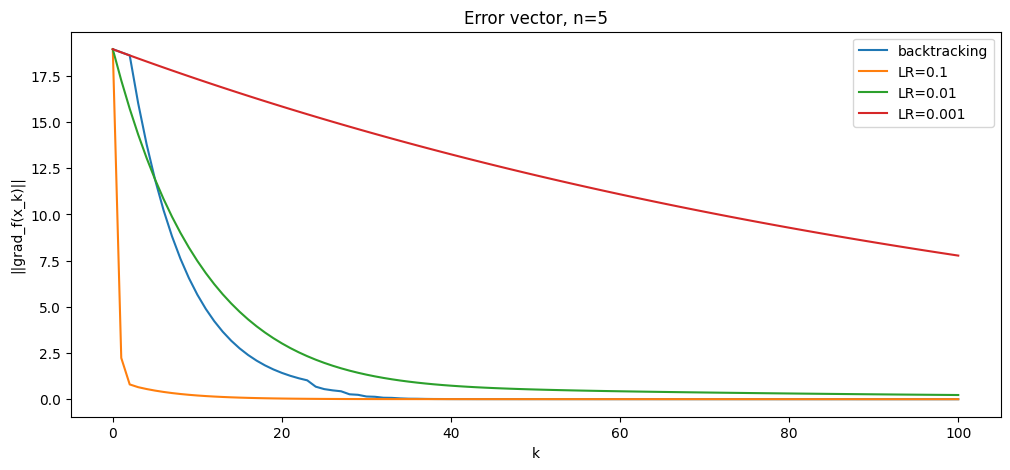

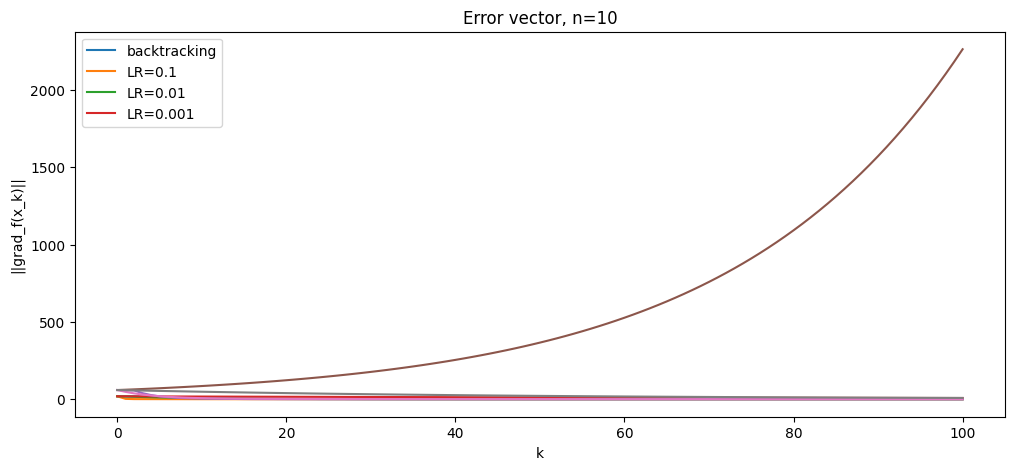

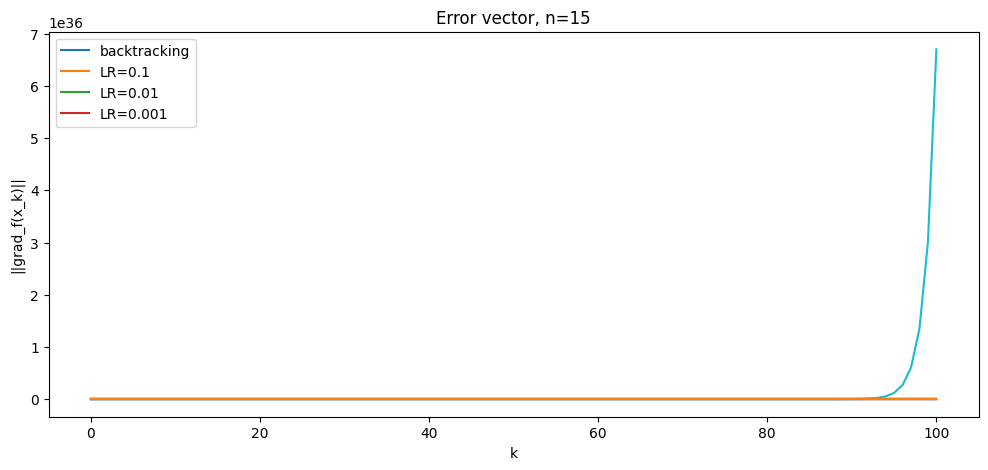

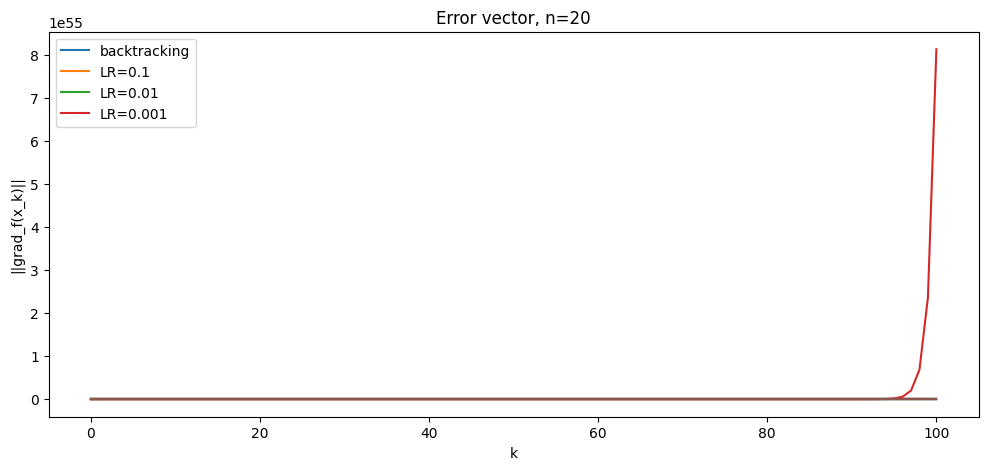

In [53]:
N = np.asarray([5, 10, 15, 20])

tolx = 1e-6
tolf = 1e-6
kmax = 100

cvector = np.asarray([0.1, 0.01, 0.001])

f_tot = []
x_tot = []
err_tot = []
k_tot = []

for n in N:

    f = lambda x: f3(x, n)
    grad_f = lambda x: grad_f3(x, n)

    x0 = np.zeros((n, ))
    x_min = np.zeros((6, n))

    x, k, f_val, grads, err_val, _  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
    
    f_tot.append(f_val)
    x_tot.append(x)
    err_tot.append(err_val)
    k_tot.append(k)
    x_min[0] = x[k]
    
    i=1
    for c in cvector:
        x, k, f_val, grads, err_val, _  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False)
        
        f_tot.append(f_val)
        x_tot.append(x)
        err_tot.append(err_val)
        k_tot.append(k)
        x_min[i] = (x[k])

        i+=1

    legend=['backtracking', 'LR=0.1', 'LR=0.01', 'LR=0.001']
    plt.figure(figsize=(12, 5))

    plt.title(f'Error vector, n={n}')
    plt.xlabel('k')
    plt.ylabel('||grad_f(x_k)||')

    for e in range(len(f_tot)):
        kk = np.arange(0, k_tot[e]+1)
        plt.plot(kk, err_tot[e])
    plt.legend(legend)

    plt.show()

    

---

# Test funciton 4

$f(x) = \frac{1}{2}||Ax − b||_2^2+\frac{λ}{2}||x||_2^2$

Similar to the previous one, now we introduced the regularization term.

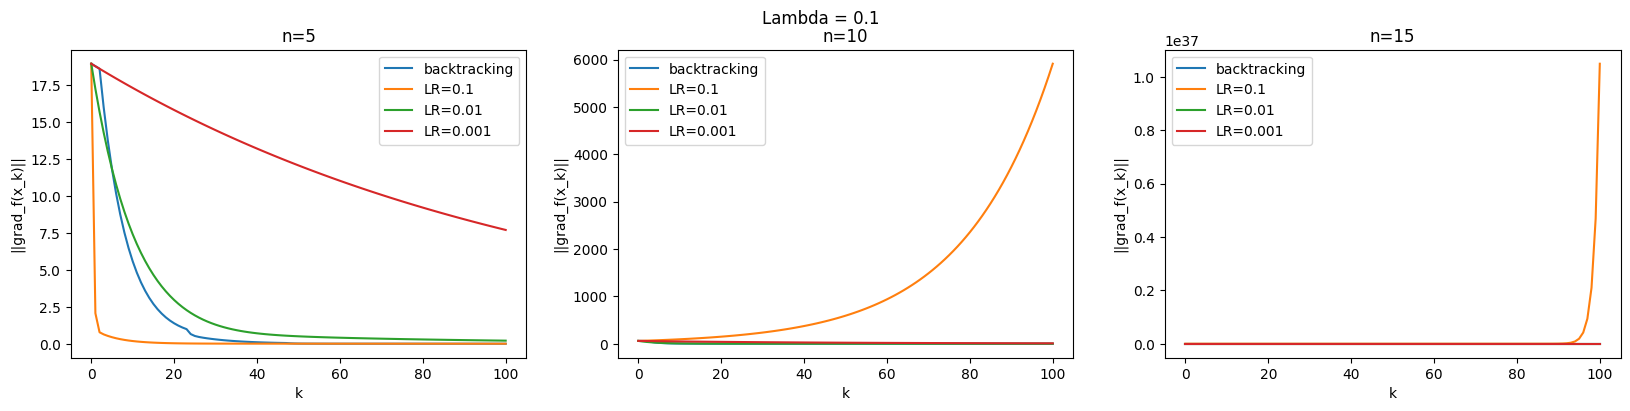

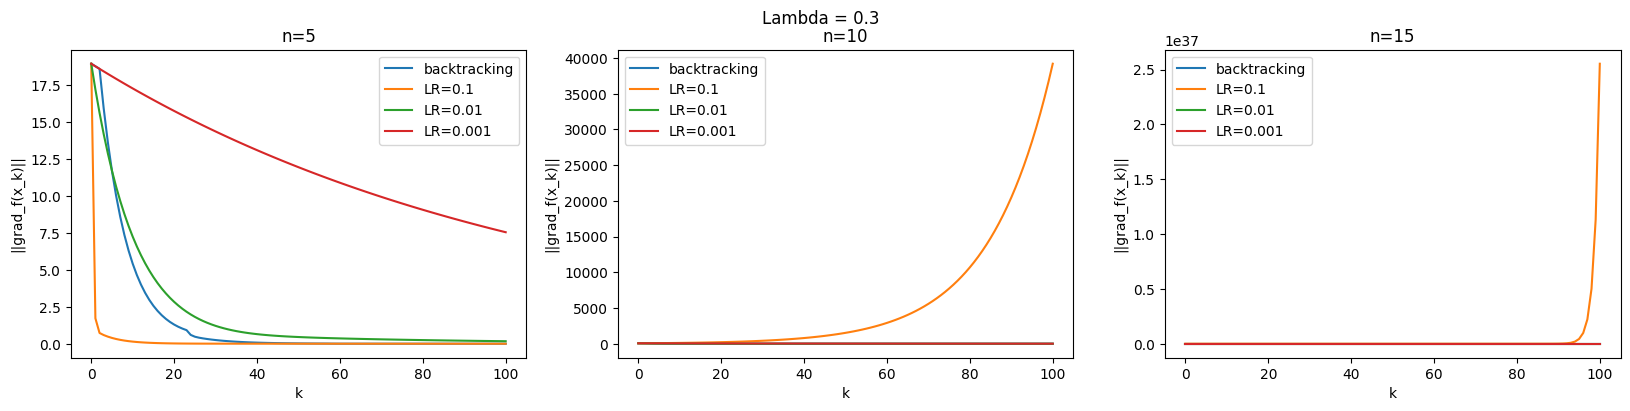

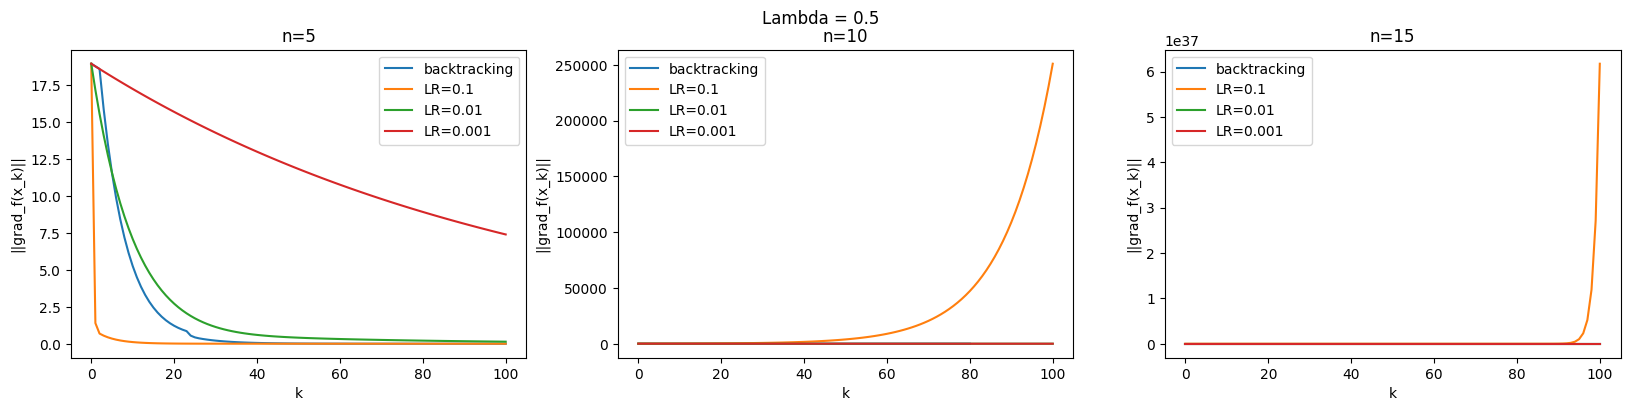

In [54]:
N = np.asarray([5, 10, 15])
L = np.asarray([0.1, 0.3, 0.5])

tolx = 1e-6
tolf = 1e-6
kmax = 100

cvector = np.asarray([0.1, 0.01, 0.001])

f_tot_L = []
x_tot_L = []
err_tot_L = []
k_tot_L = []

for lam in L:
    
    f_tot_n = []
    x_tot_n = []
    err_tot_n = []
    k_tot_n = []

    for n in N:

        f_tot = []
        x_tot = []
        err_tot = []
        k_tot = []

        x0 = np.zeros((n, ))
        x_min = np.zeros((6, n))

        f = lambda x: f4(x, n, lam)
        grad_f = lambda x: grad_f4(x, n, lam)

    
        x, k, f_val, grads, err_val, _  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
    
        f_tot.append(f_val)
        x_tot.append(x)
        err_tot.append(err_val)
        k_tot.append(k)
        x_min[0] = x[k]
        
        i=1
        for c in cvector:
            x, k, f_val, grads, err_val, _  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False)
            
            f_tot.append(f_val)
            x_tot.append(x)
            err_tot.append(err_val)
            k_tot.append(k)
            x_min[i] = (x[k])

            i+=1

        f_tot_n.append(f_tot)
        x_tot_n.append(x_tot)
        err_tot_n.append(err_tot)
        k_tot_n.append(k_tot)

    f_tot_L.append(f_tot_n)
    x_tot_L.append(x_tot_n)
    err_tot_L.append(err_tot_n)
    k_tot_L.append(k_tot_n)

for lam in range(len(L)):

    plt.figure(figsize=(20, 4))
    plt.suptitle(f'Lambda = {L[lam]}')
    legend=['backtracking', 'LR=0.1', 'LR=0.01', 'LR=0.001']
    

    for i in range(len(f_tot_L[lam])):

        plt.subplot(1, len(f_tot_L[lam]), i+1)
        plt.title(f"n={N[i]}")

    
        for e in range(len(f_tot_L[lam][i])):
            plt.xlabel('k')
            plt.ylabel('||grad_f(x_k)||')

            kk = np.arange(0, k_tot_L[lam][i][e]+1)
            plt.plot(kk, err_tot_L[lam][i][e])
            plt.legend(legend)

    plt.show()


---

# Test funciton 5

$f(x) = x^4 + x^3 -2x^2 - 2x$

We are going to test the the GD methon on the function with and without backtracking.

We are goint to plot with Learning Rate of $0.1$, $0.04$ and $0.001$ (way smaller to see the difference) to better understand the behaviour of the method.

- Only for the non-convex function defined in 5, plot it in the interval [-3; 3] and test the convergence point of GD with different values of $x_0$ and different step-sizes. Observe when the convergence point is the global minimum and when it stops on a local minimum or maximum.

C:\Users\chiar\AppData\Local\Temp\ipykernel_7564\752855263.py:69: RuntimeWarning: overflow encountered in power
  return x**4 + x**3 - 2*x**2 - 2*x
C:\Users\chiar\AppData\Local\Temp\ipykernel_7564\752855263.py:69: RuntimeWarning: overflow encountered in square
  return x**4 + x**3 - 2*x**2 - 2*x
C:\Users\chiar\AppData\Local\Temp\ipykernel_7564\752855263.py:69: RuntimeWarning: invalid value encountered in subtract
  return x**4 + x**3 - 2*x**2 - 2*x
C:\Users\chiar\AppData\Local\Temp\ipykernel_7564\752855263.py:72: RuntimeWarning: overflow encountered in power
  return 4*x**3 + 3*x**2 - 4*x -2
C:\Users\chiar\AppData\Local\Temp\ipykernel_7564\752855263.py:72: RuntimeWarning: overflow encountered in square
  return 4*x**3 + 3*x**2 - 4*x -2
C:\Users\chiar\AppData\Local\Temp\ipykernel_7564\752855263.py:69: RuntimeWarning: invalid value encountered in add
  return x**4 + x**3 - 2*x**2 - 2*x
C:\Users\chiar\AppData\Local\Temp\ipykernel_7564\752855263.py:72: RuntimeWarning: invalid value encount

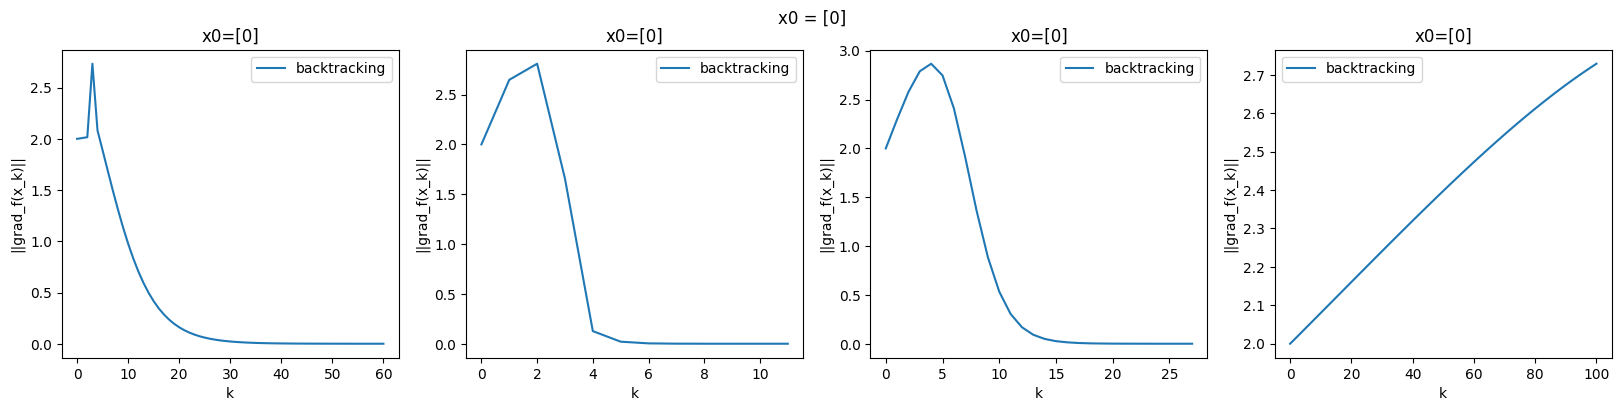

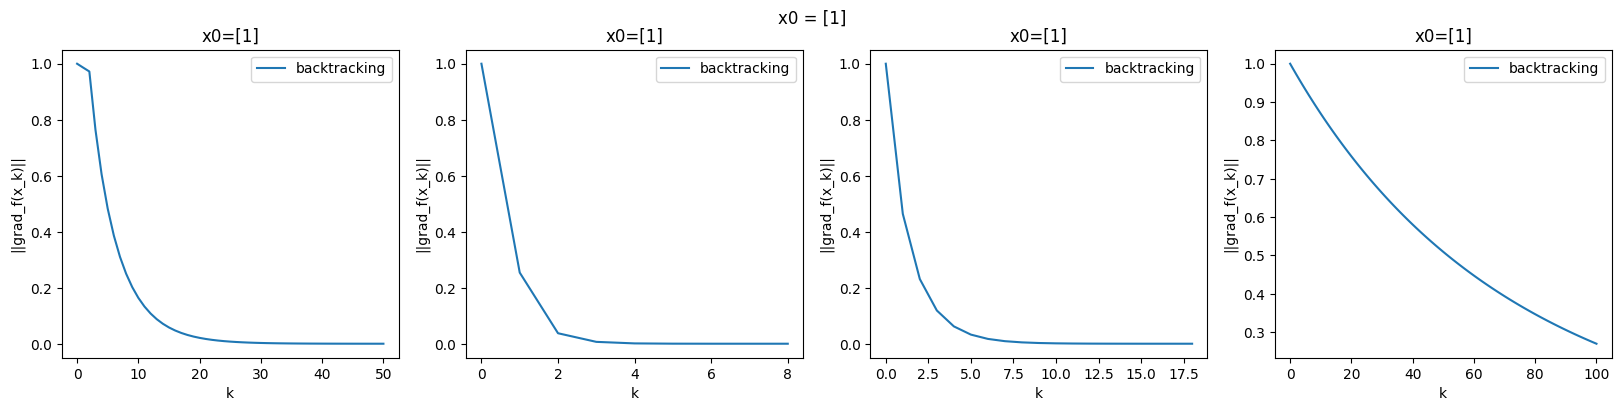

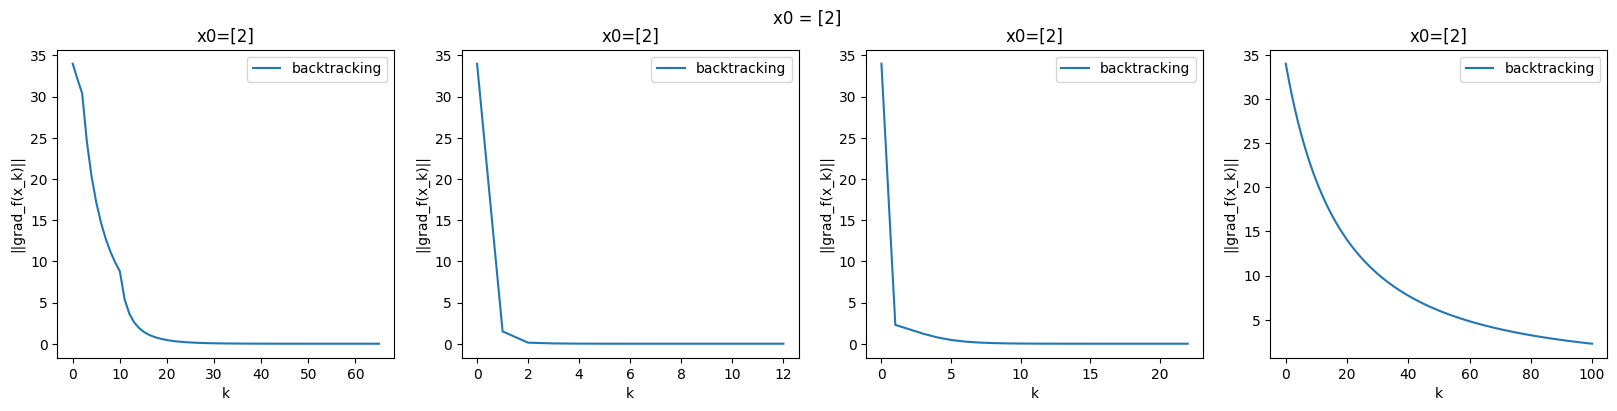

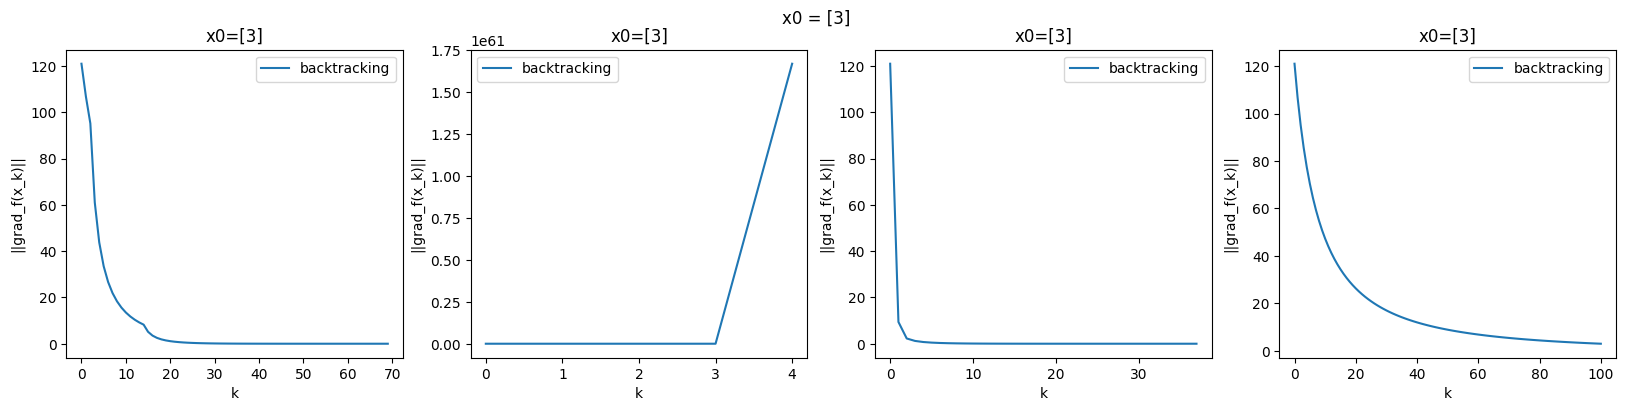

In [55]:
f = lambda x: f5(x)
grad_f = lambda x: grad_f5(x)

tolx = 1e-6
tolf = 1e-6
kmax = 100

x0_vector = np.asarray([[0],[1], [2], [3]])
cvector = np.asarray([0.1, 0.04, 0.001])

f_tot_x0 = []
x_tot_x0 = []
err_tot_x0 = []
k_tot_x0 = []

for x0 in x0_vector:

    f_tot = []
    x_tot = []
    err_tot = []
    k_tot = []

    x, k, f_val, grads, err_val, _  = GD(f, grad_f, x0, kmax, tolf, tolx, useBackTracking=True)
    f_tot.append(f_val)
    x_tot.append(x)
    err_tot.append(err_val)
    k_tot.append(k)

    i=1
    for c in cvector:
        x, k, f_val, grads, err_val, _  = GD(f, grad_f, x0, kmax, tolf, tolx, step=c, useBackTracking=False)
        
        f_tot.append(f_val)
        x_tot.append(x)
        err_tot.append(err_val)
        k_tot.append(k)
    

    f_tot_x0.append(f_tot)
    x_tot_x0.append(x_tot)
    err_tot_x0.append(err_tot)
    k_tot_x0.append(k_tot)


for x0 in range(len(x0_vector)):
    plt.figure(figsize=(20, 4))
    plt.suptitle(f'x0 = {x0_vector[x0]}')
    legend=['backtracking', 'LR=0.1', 'LR=0.04', 'LR=0.01']

    for e in range(len(f_tot_x0[x0])):
        plt.subplot(1, len(f_tot_x0[x0]), e+1)
        plt.title(f"x0={x0_vector[x0]}")

        plt.xlabel('k')
        plt.ylabel('||grad_f(x_k)||')

        kk = np.arange(0, k_tot_x0[x0][e]+1)
        plt.plot(kk, err_tot_x0[x0][e])
        plt.legend(legend)

    plt.show()